In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import os
import pickle
import scipy.io as sio
import ieeg_funcs as ief
import dgFuncs as dg
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
try_C=np.logspace(-1,2,10)
print(try_C)

[   0.1           0.18738174    0.35111917    0.65793322    1.23284674
    2.3101297     4.32876128    8.11130831   15.19911083   28.48035868
   53.36699231  100.        ]


In [64]:
bro=np.zeros(10)
bro[:5]=1
print(bro)
bro_id=np.where(bro==1)[0]
print(bro_id)
bro_id=np.setdiff1d(np.where(bro==1)[0],np.arange(0,2))
print(bro_id)
bro_id=np.where(bro[2:]==1)[0]+2
print(bro_id)

[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
[0 1 2 3 4]
[2 3 4]
[2 3 4]


In [5]:
# Get key directories
dir_dict=ief.get_path_dict()
# print(dir_dict.keys())
ftrs_root=dir_dict['ftrs_root']
# print(ftrs_root)
meta_dir=dir_dict['eu_meta']

In [6]:
# Get list of training and validation files
sub='1096'
split_fname=os.path.join(meta_dir,'data_splits_FR_'+sub+'.pkl')
print('Loading %s' % split_fname)
split_dict=pickle.load(open(split_fname,'rb'))
print(split_dict.keys())
test_files=split_dict['test_files']
train_files=split_dict['train_files']
train_szr_files=split_dict['train_szr_files']
valid_files=split_dict['valid_files']
n_train_file=len(train_files)
n_train_szr_file=len(train_szr_files)
print('%d training files (%d contain szrs)' % (n_train_file, n_train_szr_file))
n_valid_file=len(valid_files)
print('%d validation files' % n_valid_file)

Loading /Users/davidgroppe/Dropbox/TWH_INFO/EU_METADATA/data_splits_FR_1096.pkl
dict_keys(['valid_szr_files', 'train_files', 'train_szr_files', 'test_files', 'test_szr_files', 'valid_files'])
101 training files (22 contain szrs)
21 validation files


In [7]:
train_szr_files[0]

'109600102_0001'

In [ ]:
valid_bal_acc, valid_sens, valid_spec, valid_acc=ief.apply_model_2_file_list(
    model, ftr_fname_list, ftr_names, ftr_nrm_dicts, sub, n_ftr_dim, ext_list, edge_pts)

# of extra szr windows=39
That is 3.900000 seconds 


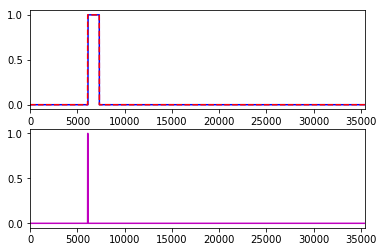

In [57]:
infname=train_szr_files[21]
orig_dict=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/EU_SZR_CLASS/1096_ORIG/'+infname+'_szr_class.npz')
neo_dict=np.load('/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/EU_SZR_CLASS/1096/'+infname+'_szr_class.npz')

orig_class=orig_dict['szr_class']
neo_class=neo_dict['szr_class']
# xlim=[5000, 5800]
xlim=[0, len(orig_class)]
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(orig_class,'b')
plt.plot(neo_class,'r--');
plt.xlim(xlim)

plt.subplot(2,1,2)
plt.plot(neo_class-orig_class,'m')
plt.xlim(xlim)

n_dif=np.sum(neo_class-orig_class)
print('# of extra szr windows=%d' % n_dif)
print('That is %f seconds ' % (n_dif/10))

In [2]:
in_file='/Users/davidgroppe/ONGOING/EU_EEG/FR_1096/109600102_0001.mat'
in_dict=sio.loadmat(in_file)
print(in_dict.keys())

dict_keys(['stop_ts', 'ieeg256', '__version__', 'start_ts', 'chan_labels', 'szr_type', 'Fs', 'tpts_sec', '__header__', 'just_ieeg_fname', '__globals__', 'is_szr'])


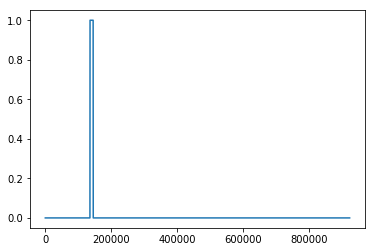

In [5]:
is_szr=in_dict['is_szr']
plt.figure(1)

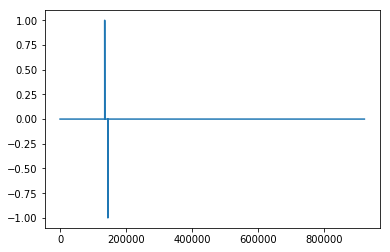

In [8]:
df_szr=np.diff(is_szr.T)
plt.figure(2)
plt.clf()
plt.plot(df_szr.T);

In [6]:
print(df_szr.shape)
print(is_szr.shape)


(1, 921599)
(921600, 1)


In [9]:
onset_ids=np.where?

In [20]:
onset_ids=np.where(df_szr.T == 1)[0]+1
print(onset_ids)
offset_ids=np.where(df_szr.T == -1)[0]
print(offset_ids)

[135168]
[144896]


(144796, 144996)

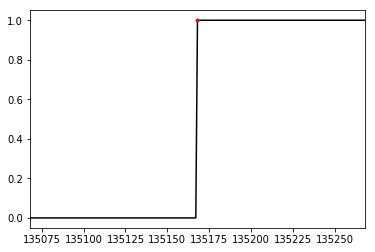

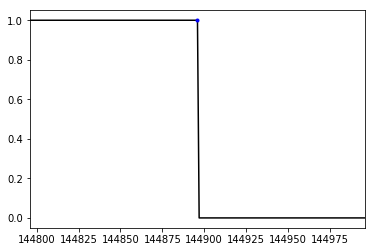

In [23]:
is_szr=in_dict['is_szr']
plt.figure(1)
plt.clf()
plt.plot(is_szr,'k-')
for t in onset_ids:
    plt.plot(t,1,'r.')
plt.xlim([np.min(onset_ids)-100, np.min(onset_ids)+100])

plt.figure(2)
plt.clf()
plt.plot(is_szr,'k-')
for t in offset_ids:
    plt.plot(t,1,'b.')
plt.xlim([np.min(offset_ids)-100, np.max(offset_ids)+100])

In [24]:
html_fname='/Users/davidgroppe/GIT/OCSVM_EDMSE/matlab/EU/metadata/all_szrs_FR_888.html'
htable=pd.read_html(html_fname)

In [25]:
htable[0].tail()

,#,classif.,onset,offset,p.,vig.,origin,semiology
5,6:,CP,eeg: 23.06.'09 11:45:01.008789,eeg: 23.06.'09 11:47:03.908203,b,awake,"origin: HL4,HL5,HL6,HL7,HL8 early: GA1, GA2, ...",NaN
6,7:,CP,eeg: 23.06.'09 14:25:52.366211,eeg: 23.06.'09 14:27:52.616211,b,awake,"origin: HL2,HL3,HL4,HL5,HL6,HL7,HL8 early: HL...",NaN
7,8:,CP,eeg: 23.06.'09 16:09:33.741211,eeg: 23.06.'09 16:11:57.724609,r,awake,"origin: HL3,HL4 early: HL2, HL3, HL4, HL5, HL...",NaN
8,9:,UC,eeg: 24.06.'09 14:00:30.941406,eeg: 24.06.'09 14:01:43.983398,b,awake,"origin: HL3,HL4 early: late: GA1, GA2, GA3, G...",NaN
9,total:,total:,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
bro=htable[0].iloc[-1,2]
print(bro)
bro=np.nan
~np.isnan(bro)
# bro=htable[0].drop(htable[0].index[9])

nan


False

In [48]:
bro=htable[0].iloc[-1,1]
print(bro)
print(len(bro))

total:
6
